In [2]:
# Import necessary modules
from bs4 import BeautifulSoup  # For web scraping
import requests  # For making HTTP requests
import pandas as pd  # For working with dataframes
import numpy as np  # For working with numerical data
import datetime as dt  # For working with dates and times
import nltk  # For natural language processing
import re  # For regular expressions
import yfinance as yf  # For downloading financial data

import sys
sys.path.append('../')  # Add parent directory to path


[*********************100%%**********************]  2 of 2 completed


<Axes: xlabel='Date'>

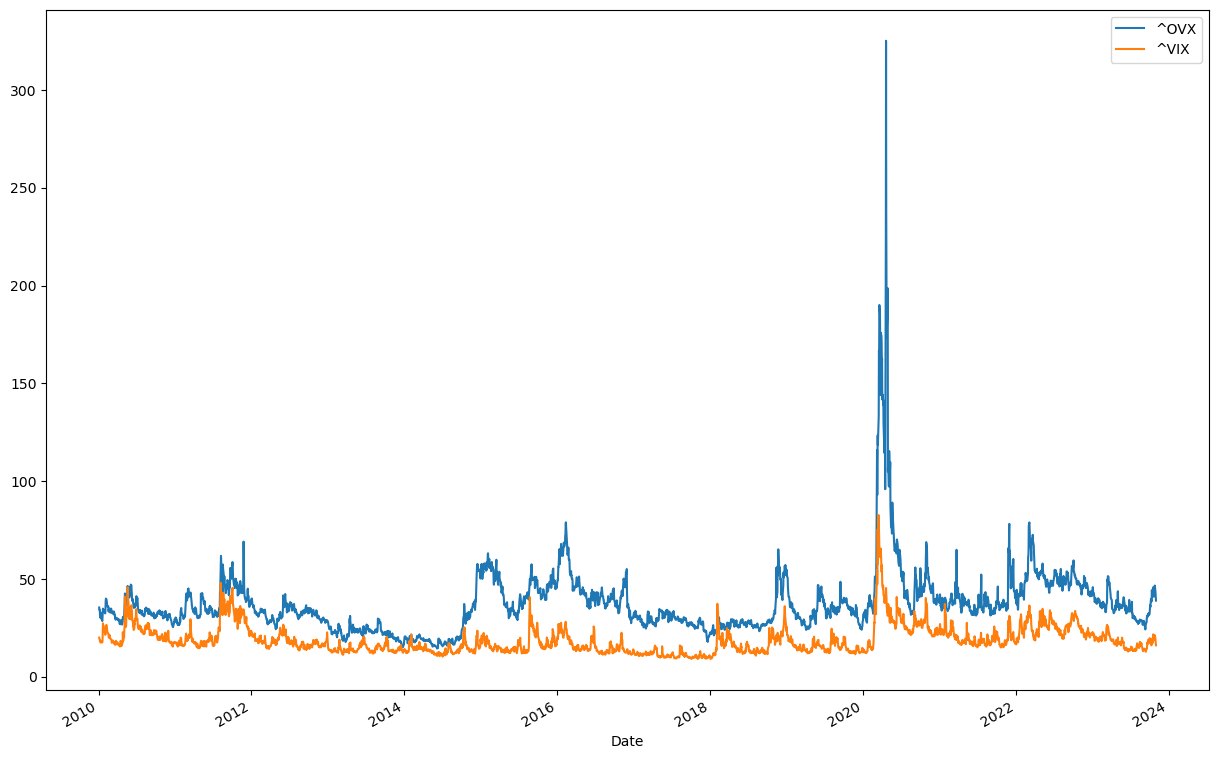

In [27]:
yf.download(['^OVX', '^VIX'], start='2010-01-01')['Adj Close'].plot(figsize=(15, 10))   

## Yahoo news

In [3]:
brent_url = 'https://finance.yahoo.com/quote/BZ=F/'

brent_response = requests.get(brent_url)

soup = BeautifulSoup(brent_response.text, 'html.parser')

# Get newsstream
newsstream = soup.find(id='quoteNewsStream-0-Stream')

# Get news articles
news_articles = newsstream.find_all('a')

# Get hrefs


for article in news_articles:
    response = requests.get('https://finance.yahoo.com/' + article['href'])
    soup = BeautifulSoup(response.text, 'html.parser')
    
    article_text = ""
    for paragraph in soup.find_all('p'):
        article_text += paragraph.get_text() + "\n"

    print(article_text)

ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/BZ=F/ (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001F95D536C50>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [59]:
article_url = 'https://finance.yahoo.com/news/12-best-crude-oil-stocks-073221408.html'

# Get the article
response = requests.get(article_url)
soup = BeautifulSoup(response.text, 'html.parser')

title = soup.find('h1').text

date = soup.find('time').text

article = re.sub(
    r'([.!?])([A-Z])', 
    r'\1 \2', 
    soup.find(
        'div', 
        class_='caas-body'
    ).text
)

sentences = nltk.tokenize.sent_tokenize(article, language='english')

for sentence in sentences:
    print(sentence)

# Create .txt file
filename = title

with open(f'articles\{filename}.txt', 'w') as file_object:
    file_object.write(title + '\n')
    file_object.write(date + '\n')
    for sentence in sentences:
        file_object.write(sentence + '\n')



In this article, we discuss the 12 best crude oil stocks to buy as tensions rise.
To skip the detailed analysis of the crude oil market, go directly to the 5 Best Crude Oil Stocks To Buy.
Amid the bear market of 2022, oil stocks stood out as some of the few success stories.
While inflation negatively impacted consumer spending and business sentiment, it had a positive effect on the price of crude oil.
Additionally, Russia's invasion of Ukraine further boosted the performance of oil stocks, which managed to achieve significant gains, despite the S&P 500 index's approximately 20% loss for the year.
However, 2023 tells a different tale.
Crude oil prices have experienced a substantial decrease, nearly halving from their 2022 peak at around $120 per barrel.
As a consequence, oil stocks have faced challenges in the current year.
With that said, oil prices had already climbed to nearly $98 per barrel in mid-September following the decision by Saudi Arabia and Russia to extend their voluntary 